In [36]:
import rebound
import numpy as np

In [37]:
#Data from HR8799, 2016 JWang paper
d2r = (2*np.pi)/360 #converts degrees to radians
ibcde = 27*d2r #all bodies have same approx angle of inclination
Obcde = 68*d2r #all bodies have same approx Omega
ob = 87*d2r
oc = 67*d2r
od = 17*d2r
oe = 110*d2r

In [38]:
sim8 = rebound.Simulation()
sim8.units = ('AU','days','Msun')
sim8.add(m = 1.47) #A
sim8.add(m = 0.005, a = 71, e = .02, inc = ibcde, Omega = Obcde, omega = ob) #b
sim8.add(m = 0.005, a = 43, e = .02, inc = ibcde, Omega = Obcde, omega = oc) #c
sim8.add(m = 0.005, a = 26, e = .13, inc = ibcde, Omega = Obcde, omega = od) #d
sim8.add(m = 0.005, a = 16, e = .12, inc = ibcde, Omega = Obcde, omega = oe) #e
sim8.status()

---------------------------------
REBOUND version:     	3.12.2
REBOUND built on:    	Jul 13 2020 09:56:40
Number of particles: 	5
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.47 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.Particle object, m=0.005 x=-56.038986875085705 y=26.568743281933887 z=31.54536781260709 vx=-0.0010556361439237798 vy=-0.0022979141295168108 vz=6.010107690334957e-05>
<rebound.Particle object, m=0.005 x=-26.06743421346861 y=28.303757172166133 z=17.717258768517816 vx=-0.002177254842103215 vy=-0.0023619690743482105 vz=0.0005777541417410734>
<rebound.Particle object, m=0.005 x=2.362411494446524 y=22.449279211194128 z=3.16887033724173 vx=-0.004225601356082386 vy=0.00020966764296764882 vz=0.002036294121256693>
<rebound.Particle object, m=0.005 x=-13.002849070091946 y=0.21151540246585 z=6.183227263632364 vx=-0.00043648591759462243 vy=-0.005850864374

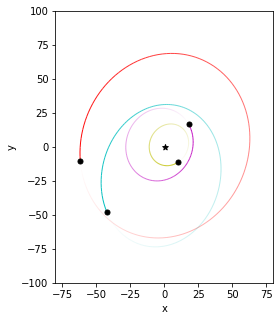

In [39]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
sim8.move_to_com()

tr = 100
eb = np.zeros(tr)
ec = np.zeros(tr)
ed = np.zeros(tr)
ee = np.zeros(tr)

for i in range(tr):
    sim8.integrate(sim8.t+1825) #5 yrs
    fig, ax = rebound.OrbitPlot(sim8,color=True, xlim = [-80,80], ylim = [-100,100])
    
    display(fig)
    plt.close(fig)
    clear_output(wait=True)

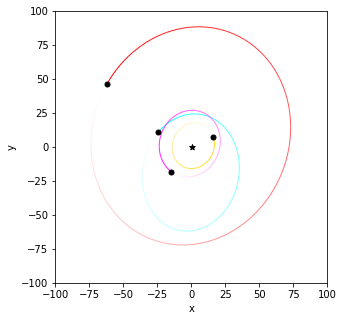

In [40]:
t = 100
tr = range(100)
eb = np.zeros(t)
ec = np.zeros(t)
ed = np.zeros(t)
ee = np.zeros(t)

for i in tr:
    sim8.integrate(sim8.t+1825) #5 yrs
    fig, ax = rebound.OrbitPlot(sim8,color=['red','cyan','magenta','gold'] , xlim = [-100,100], ylim = [-100,100])
    eb[i] = sim8.particles[1].e
    ec[i] = sim8.particles[2].e
    ed[i] = sim8.particles[3].e
    ee[i] = sim8.particles[4].e
    display(fig)
    plt.close(fig)
    clear_output(wait=True)


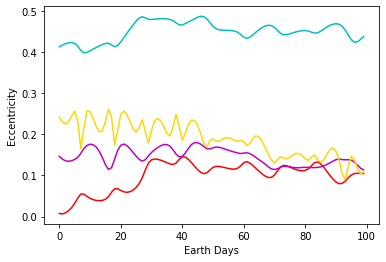

In [35]:
plt.plot(tr, eb, 'r')
plt.plot(tr, ec, 'c')
plt.plot(tr, ed, 'm')
plt.plot(tr, ee, 'gold')
plt.xlabel('Earth Days')
plt.ylabel('Eccentricity')
plt.show()